In [1]:
import pandas as pd
import os
import numpy as np
import warnings
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.api import VAR
import polars as pl
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
#-------------------------------------------------------#-------------------------------------------------------#
# The dataframe are created following the output of the LOBSTER data:
#     The variables for the message are (in order): Time: (expressed as second after 00:00); 
#                                   Event type: (1: submission of new l.o.: 2:Cancellation (partial del. of l.o.); 3:Deletion of l.o.; 4:Exec. of visible l.o.; 5: exec. of hidden l.o.; 6: cross trade; 7:trading halt indicator)
#                                   Order ID (0 for hidden order);
#                                   Size
#                                   Price: Dollar price times 10000. E.G. $91.14 -> 911400
#                                   Direction: -1 Sell, +1 Buy
#
#     VERY IMPORTANT: when event type = 7 it means the trades are halted, Price and Direction are setted to -1
#                     all the other to 0. When trading resume event type is 7 but PRICE = 1!!!!  
#-------------------------------------------------------#-------------------------------------------------------#

def dfmessage():
    warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

    data_cube_message = {}
    csv_directory_message = 'C:/Users/gabri/Desktop/Uni/Msc QF/2nd year/AlgoTrading/Paper/Data/Message' #Change with personal path, this must be a folder with inside only the "MESSAGE" files
    for file_name in os.listdir(csv_directory_message):
        if file_name.endswith('.csv'):  # Only process CSV files
            
            day_label = file_name[:16]
            
            file_path = os.path.join(csv_directory_message, file_name)
            df = pd.read_csv(file_path, header=None, skiprows=1)
            df = df.drop(df.columns[-1], axis=1)
            
            df.columns = ["Sec. After MidN", "Event Type", "Order ID", "Size", "Price", "Direction"]
            df["Check"] = range(len(df))
            
            df["Direction"] = df["Direction"] * -1
            df["Signed Size"] = df["Direction"] * df["Size"]
            
            data_cube_message[day_label] = df
            print(f"**********Creating Dataframe for {day_label}**********", "\n")
    print("Dictionary for Trade Book created!!")
            
    return data_cube_message



dictmessage = dfmessage()


#-------------------------------------------------------#-------------------------------------------------------#
# The dataframe are created following the output of the LOBSTER data:
#     The variables for the order are (in order): Best Ask price
#                                                 Best Ask Size
#                                                 Best Bid Price
#                                                 Best Bid Size
#-------------------------------------------------------#-------------------------------------------------------#



def dforder():
    data_cube_orderbook = {}
    csv_directory_order = 'C:/Users/gabri/Desktop/Uni/Msc QF/2nd year/AlgoTrading/Paper/Data/OrderBook' #Change with personal path, this must be a folder with inside only the "ORDER" files

    for file_name in os.listdir(csv_directory_order):
        if file_name.endswith('.csv'):  
            
            day_label = file_name[:16]
            
            file_path = os.path.join(csv_directory_order, file_name)
            df = pd.read_csv(file_path, header=None, skiprows=1)
            
            df.columns = ["BestAsk Price", "BestAsk Size", "BestBid Price", "BestBid Size"]
            


          
            data_cube_orderbook[day_label] = df
            print(f"**********Creating Dataframe for {day_label}**********", "\n")
    print("Dictionary for LOB created!!")
    return data_cube_orderbook

dictorder = dforder()





**********Creating Dataframe for MSFT_2020-03-02_********** 

**********Creating Dataframe for MSFT_2020-03-03_********** 

**********Creating Dataframe for MSFT_2020-03-04_********** 

**********Creating Dataframe for MSFT_2020-03-05_********** 

**********Creating Dataframe for MSFT_2020-03-06_********** 

**********Creating Dataframe for MSFT_2020-03-09_********** 

**********Creating Dataframe for MSFT_2020-03-10_********** 

**********Creating Dataframe for MSFT_2020-03-11_********** 

**********Creating Dataframe for MSFT_2020-03-12_********** 

**********Creating Dataframe for MSFT_2020-03-13_********** 

**********Creating Dataframe for MSFT_2020-03-16_********** 

**********Creating Dataframe for MSFT_2020-03-17_********** 

**********Creating Dataframe for MSFT_2020-03-18_********** 

**********Creating Dataframe for MSFT_2020-03-19_********** 

**********Creating Dataframe for MSFT_2020-03-20_********** 

**********Creating Dataframe for MSFT_2020-03-23_********** 

********

In [3]:
def dfjoiner():
    dictjoined = {}
    for i in dictmessage:
        res = pd.concat([dictmessage[i], dictorder[i]], axis=1)
        resf = res[res["Event Type"].isin([4, 5])]
        dictjoined[i] = resf
    return dictjoined

dictjoined = dfjoiner()

def addvariables():
    dictionary = {}
    for i in dictjoined:
        df = dictjoined[i]
        
        df["MidPrice"] = (df["BestAsk Price"] + df["BestBid Price"])/2
        df["MidPrice_t+1"] = df["MidPrice"].shift(-1)
        df["LN Return"] = np.log(df["MidPrice_t+1"]/df["MidPrice"])
        df["DepthImbalance"] = ((df["BestBid Size"] - df["BestAsk Size"]) / (df["BestBid Size"] + df["BestAsk Size"]))
        df = df[:-1]
        dictionary[i] = df
    return dictionary

dbdata = addvariables()


In [12]:
def getKey():
    keylist = []
    for i in dictjoined:
        keylist.append(i)
    return keylist

keylist = getKey()

print(np.array(keylist).T)

['MSFT_2020-03-02_' 'MSFT_2020-03-03_' 'MSFT_2020-03-04_'
 'MSFT_2020-03-05_' 'MSFT_2020-03-06_' 'MSFT_2020-03-09_'
 'MSFT_2020-03-10_' 'MSFT_2020-03-11_' 'MSFT_2020-03-12_'
 'MSFT_2020-03-13_' 'MSFT_2020-03-16_' 'MSFT_2020-03-17_'
 'MSFT_2020-03-18_' 'MSFT_2020-03-19_' 'MSFT_2020-03-20_'
 'MSFT_2020-03-23_' 'MSFT_2020-03-24_' 'MSFT_2020-03-25_'
 'MSFT_2020-03-26_' 'MSFT_2020-03-27_' 'MSFT_2020-03-30_'
 'MSFT_2020-03-31_']


In [ ]:
dictjoined["MSFT_2020-03-02_"]
        

In [5]:
dbdata["MSFT_2020-03-02_"][100:150]

,Sec. After MidN,Event Type,Order ID,Size,Price,Direction,Check,Signed Size,BestAsk Price,BestAsk Size,BestBid Price,BestBid Size,MidPrice,MidPrice_t+1,LN Return,DepthImbalance
316,34201.393725,5,0,90,1649900,-1,316,-90,1650000,7721,1649300,18,1649650.0,1649650.0,0.000000,-0.995348
317,34201.393725,4,21642139,81,1650000,1,317,81,1650000,7640,1649300,18,1649650.0,1649650.0,0.000000,-0.995299
318,34201.396879,5,0,100,1649900,-1,318,-100,1650000,7640,1649300,18,1649650.0,1649650.0,0.000000,-0.995299
319,34201.398486,4,21642139,3,1650000,1,319,3,1650000,7637,1649300,18,1649650.0,1649650.0,0.000000,-0.995297
320,34201.402559,5,0,16,1649900,-1,320,-16,1650000,7637,1649300,18,1649650.0,1649650.0,0.000000,-0.995297
321,34201.402628,5,0,3,1649900,-1,321,-3,1650000,7637,1649300,18,1649650.0,1649650.0,0.000000,-0.995297
322,34201.404523,5,0,81,1649900,-1,322,-81,1650000,7637,1649300,18,1649650.0,1649650.0,0.000000,-0.995297
326,34201.413232,4,21642139,328,1650000,1,326,328,1650000,7309,1649300,1,1649650.0,1649650.0,0.000000,-0.999726
327,34201.413232,4,21642143,10,1650000,1,327,10,1650000,7299,1649300,1,1649650.0,1649650.0,0.000000,-0.999726
328,34201.413232,4,21642147,100,1650000,1,328,100,1650000,7199,1649300,1,1649650.0,1649650.0,0.000000,-0.999722


In [4]:
def adf(var):
    for i in dbdata:
        result = sm.tsa.adfuller(dbdata[i][var])

        print("\n")
        print("***********")
        print(f"Results for {i} are:")
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        if result[1] < 0.05:
            print("We reject H0, the time series seems to be stationary")
        else:
            print("We fail to reject H0, the time series seems NOT stationary")

        print('Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')

    
adf("LN Return")



***********
Results for MSFT_2020-03-02_ are:
ADF Statistic: -90.73801024905958
p-value: 0.0
We reject H0, the time series seems to be stationary
Critical Values:
   1%: -3.4303836776246777
   5%: -2.861554885062037
   10%: -2.5667779227837952


***********
Results for MSFT_2020-03-03_ are:
ADF Statistic: -136.27504188479256
p-value: 0.0
We reject H0, the time series seems to be stationary
Critical Values:
   1%: -3.430379728491667
   5%: -2.8615531396065323
   10%: -2.5667769937390097


***********
Results for MSFT_2020-03-04_ are:
ADF Statistic: -72.18780995965626
p-value: 0.0
We reject H0, the time series seems to be stationary
Critical Values:
   1%: -3.430398269980721
   5%: -2.861561334636799
   10%: -2.566781355669892


KeyboardInterrupt: 

In [5]:
def linearVAR(key, lag=None):
    resultLinear = {}
    #for i in dbdata:
    #   key = i   #just 1) uncomment this line and the one above, 2)comment the one below (if key in dbdata:) and 3)to make the operation run on all the day in dbdata. 
    if key in dbdata:
        df = dbdata[key]
        data = df[["LN Return", "Direction"]]

        if lag is None:
            bic = []
            for x in range(1, 30):
                model = VAR(data)
                partial_res = model.fit(x)
                bic.append(partial_res.bic)
            best_lag = bic.index(min(bic)) + 1
        else:
                
            best_lag = lag

        model = VAR(data)
        final_res = model.fit(best_lag)
        resultLinear[key] = final_res

        print("**************************************")
        print(f"The Best Lag for the day {key} is {best_lag}. According to {'BIC' if lag is None else 'user-specified lag'}")
        print(final_res.summary())
        print("**************************************")
        print("**************************************")
        print("\n")
    else: 
        raise KeyError(f"The key '{key}' is not found in the database. Please check the key, using the function getKey(), and try again.")
    return resultLinear

dict_res_VAR = linearVAR("MSFT_2020-03-02_", 5)
        


C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**************************************
The Best Lag for the day MSFT_2020-03-02_ is 5. According to user-specified lag
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 31, Jan, 2025
Time:                     18:27:43
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -19.9389
Nobs:                     194193.    HQIC:                  -19.9397
Log likelihood:       1.38504e+06    FPE:                2.18848e-09
AIC:                     -19.9401    Det(Omega_mle):     2.18824e-09
--------------------------------------------------------------------
Results for equation LN Return
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.000003         0.000000           18.565           0.000
L1.LN Return         

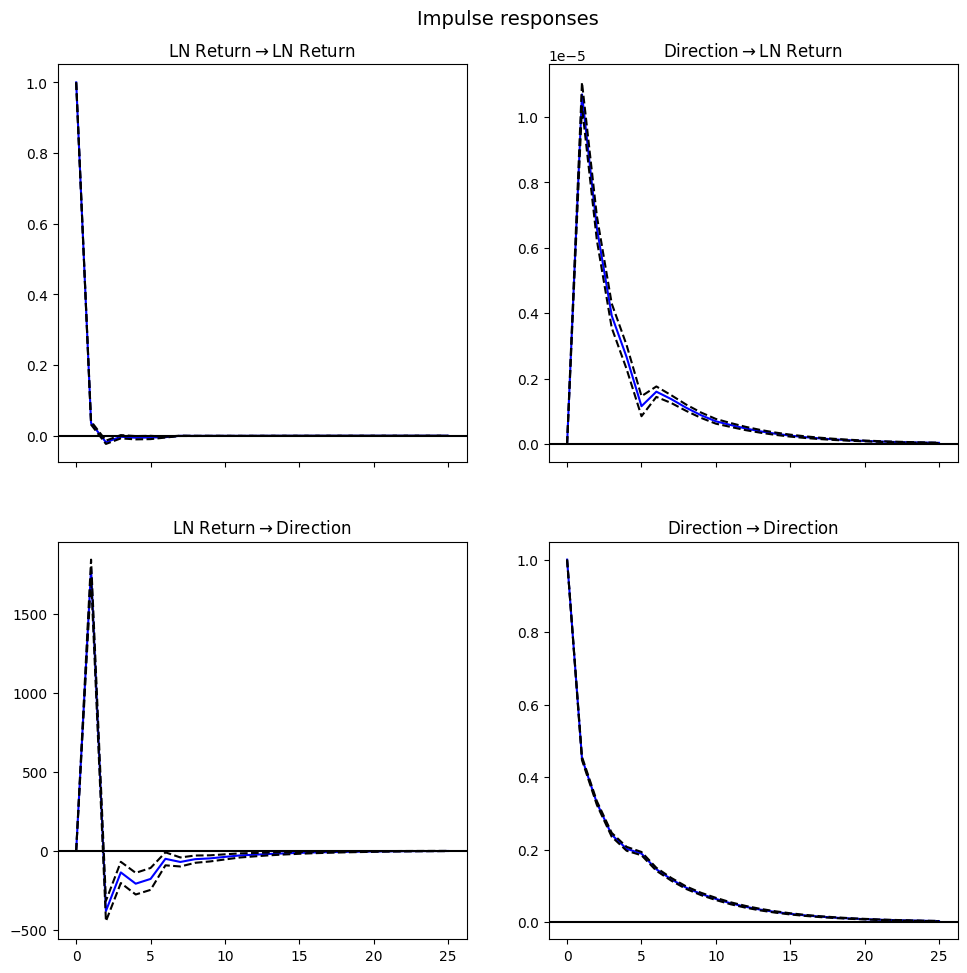

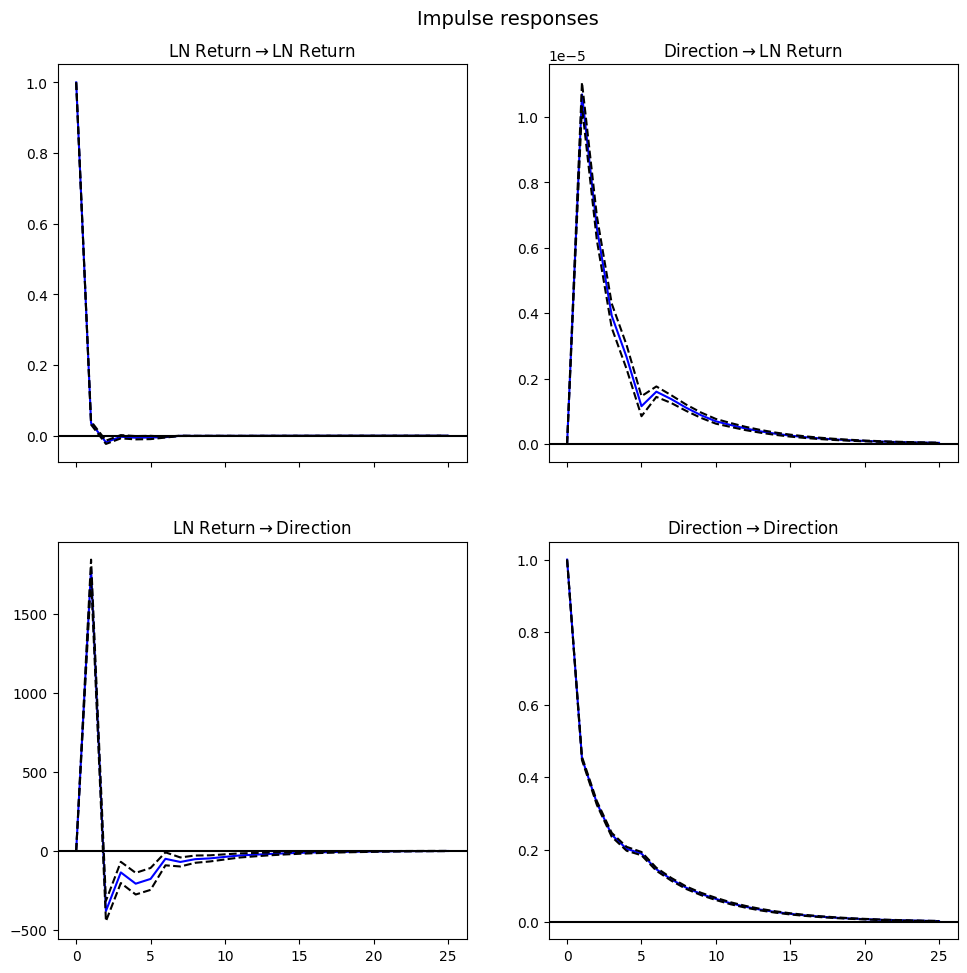

In [6]:
irf2 = dict_res_VAR["MSFT_2020-03-02_"].irf(periods=25, var_decomp=None, var_order=None)
irf2.plot()

In [25]:

#-------------------------------------------------------#-------------------------------------------------------#
#
#
#                               Function to extract the coefficient matrix from the VAR results
#
#
#-------------------------------------------------------#-------------------------------------------------------#



def coef_matrix(x):
    dict_coef_matrix = {}
    for i in x:
        dict_coef_matrix[i] = x[i].coefs
    return dict_coef_matrix

dict_coef_matrix = coef_matrix(dict_res_VAR)


#-------------------------------------------------------#-------------------------------------------------------#
#
#
#                               Function to calculate the correlation of the residuals, if they are correlated
#                               we could hortogonalize the shock by decomposing with cholesky the corr matrix 
#                               and then in the function below ("VMA_representation") multiply the B with the Lower
#                               triangular part of the output of cholesky. 
#                                                               
#-------------------------------------------------------#-------------------------------------------------------#

def corr_residuals(x):
    dict_residuals_VAR = {}
    for i in x:
        df_corr = x[i].resid 
        dict_residuals_VAR[i] = x[i].resid
        residual_corr = df_corr.corr()

        print("\n")
        print("**************************************")
        print(f"The corr. for the residuals of the day {i} is:", "\n")
        print(residual_corr)

        

        print("**************************************")
        print("**************************************")
    return dict_residuals_VAR 


dict_residuals_VAR = corr_residuals(dict_res_VAR)

#-------------------------------------------------------#-------------------------------------------------------#
#
#
#                 This function compute the VMA representation of the VAR model, it takes into account the horizon
#                 we want to forecast the IR, by changing n, the parameter.  
#
#-------------------------------------------------------#-------------------------------------------------------#

def VMA_representation(x, n: int):
    dict_imp_resp_coeff_matrix = {}

    for i in x:
        A = x[i]
        n_vars = len(A[0])
        horizon = n
        B = np.zeros((horizon, n_vars, n_vars))
        B[0] = np.eye(n_vars)

        for j in range(1, horizon):
            for lag in range(1, min(j+1, len(A) + 1)):
                B[j] += np.dot(A[lag-1], B[j-lag])
        dict_imp_resp_coeff_matrix[i] = B
    return dict_imp_resp_coeff_matrix

dict_imp_resp_coeff_matrix = VMA_representation(dict_coef_matrix, 5)
    

        




**************************************
The corr. for the residuals of the day MSFT_2020-03-02_ is: 

           LN Return  Direction
LN Return   1.000000   0.263591
Direction   0.263591   1.000000
**************************************
**************************************


In [25]:


def get_resid(x):
    residuals_list = []
    for i in x:
        df_corr = x[i].resid
        df_corr['key'] = i  # Add a column to identify the source
        residuals_list.append(df_corr)
    
    # Concatenate all residuals DataFrames into a single DataFrame
    combined_residuals = pd.concat(residuals_list, ignore_index=True)
    
    return combined_residuals

combined_residuals_df = get_resid(dict_res_VAR)
combined_residuals_df


,LN Return,Direction,key
0,0.000554,-0.238866,MSFT_2020-03-02_
1,-0.000012,0.786430,MSFT_2020-03-02_
2,0.000099,-0.458416,MSFT_2020-03-02_
3,0.000001,-0.571360,MSFT_2020-03-02_
4,0.000014,-0.105980,MSFT_2020-03-02_
...,...,...,...
194188,0.000007,1.724895,MSFT_2020-03-02_
194189,-0.000014,0.855753,MSFT_2020-03-02_
194190,-0.000016,0.640847,MSFT_2020-03-02_
194191,-0.000016,0.550856,MSFT_2020-03-02_


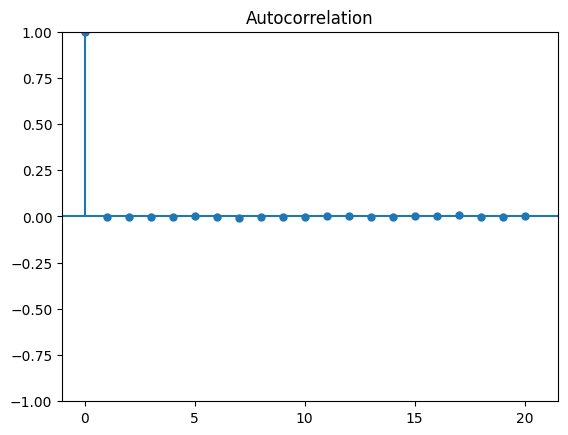

In [26]:
sm.graphics.tsa.plot_acf(combined_residuals_df["LN Return"], lags=20)
plt.show()

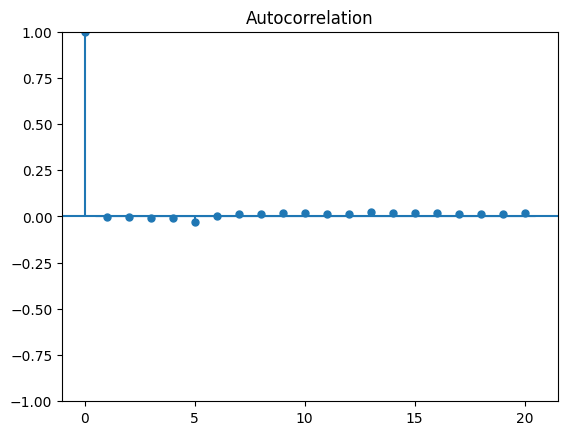

In [27]:
sm.graphics.tsa.plot_acf(combined_residuals_df["Direction"], lags=20)
plt.show()

In [26]:
#-------------------------------------------------------#-------------------------------------------------------#
#
#           This function cumpute the cumulative impulse resposnse function as specified in the paper
#   
#
#-------------------------------------------------------#-------------------------------------------------------#
def irf():
    dict_cum_irf = {}
    for i in dict_imp_resp_coeff_matrix:
        B = dict_imp_resp_coeff_matrix[i]
        n_vars = len(B[0])
        b_sum = sum(submatrix[0][1] for submatrix in B)
        r_x = pd.DataFrame()
        r_x["CIRF"] = dict_residuals_VAR[i]["Direction"] * b_sum
        dict_cum_irf[i] = r_x
    return dict_cum_irf

dict_cum = irf()
        
        

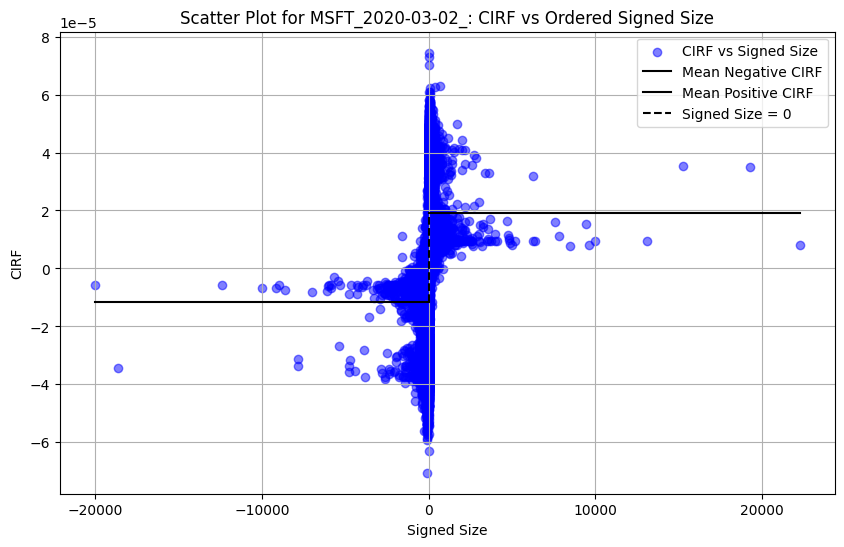

In [37]:
#-------------------------------------------------------#-------------------------------------------------------#
#
#       We plot the effect of the CIRF that is calculated with the function above
#
#
#-------------------------------------------------------#-------------------------------------------------------#
def plotting():
    for i in dict_cum:
        df = dict_cum[i]
        # Create the "Signed Size" column
        df["Signed Size"] = (dbdata[i]["Size"][:len(df)]) * (dbdata[i]["Direction"][:len(df)])
        
        # Sort the DataFrame by "Signed Size"
        dfsort = df.sort_values(by="Signed Size")
        
        # Calculate the mean CIRF values for negative and positive Signed Size
        mean_negative_cirf = dfsort[dfsort["Signed Size"] < 0]["CIRF"].mean()
        mean_positive_cirf = dfsort[dfsort["Signed Size"] >= 0]["CIRF"].mean()
        
        # Plot the sorted values
        plt.figure(figsize=(10, 6))
        plt.scatter(dfsort["Signed Size"], dfsort["CIRF"], color='blue', label='CIRF vs Signed Size', alpha=0.5)  # Set alpha to 0.5 to show blue dots
        
        # Add horizontal lines for the mean CIRF values
        plt.plot([dfsort["Signed Size"].min(), 0], [mean_negative_cirf, mean_negative_cirf], color='black', linestyle='-', label='Mean Negative CIRF')
        plt.plot([0, dfsort["Signed Size"].max()], [mean_positive_cirf, mean_positive_cirf], color='black', linestyle='-', label='Mean Positive CIRF')
        
        # Add vertical line at Signed Size = 0
        plt.plot([0, 0], [mean_negative_cirf, mean_positive_cirf], color='black', linestyle='--', label='Signed Size = 0')
        
        plt.title(f'Scatter Plot for {i}: CIRF vs Ordered Signed Size')
        plt.xlabel('Signed Size')
        plt.ylabel('CIRF')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
plotting()

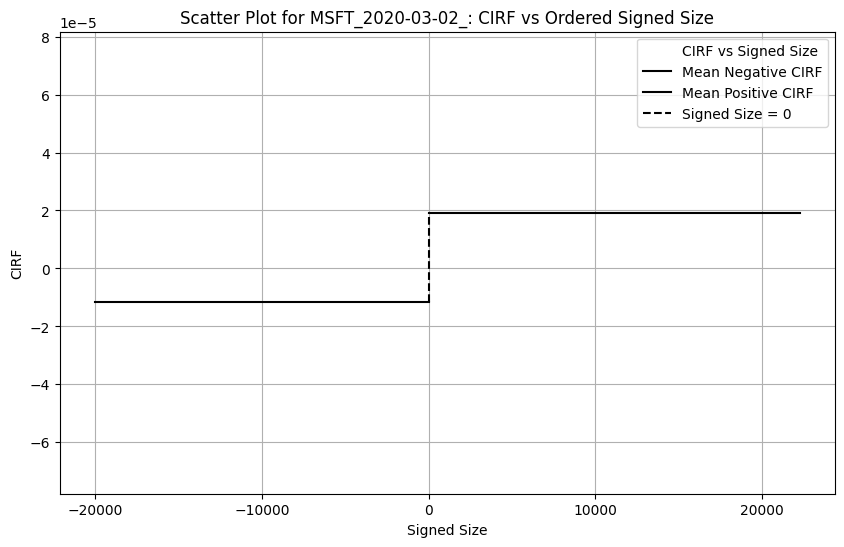

In [ ]:
#-------------------------------------------------------#-------------------------------------------------------#ù#
#
#       A lighter version of the plotting function above.
#
#
#-------------------------------------------------------#-------------------------------------------------------#

def simple_plotting():
    for i in dict_cum:
        df = dict_cum[i]
        # Create the "Signed Size" column
        df["Signed Size"] = (dbdata[i]["Size"][:len(df)]) * (dbdata[i]["Direction"][:len(df)])
        
        # Sort the DataFrame by "Signed Size"
        dfsort = df.sort_values(by="Signed Size")
        
        # Calculate the mean CIRF values for negative and positive Signed Size
        mean_negative_cirf = dfsort[dfsort["Signed Size"] < 0]["CIRF"].mean()
        mean_positive_cirf = dfsort[dfsort["Signed Size"] >= 0]["CIRF"].mean()
        
        # Plot the sorted values
        plt.figure(figsize=(10, 6))
        plt.scatter(dfsort["Signed Size"], dfsort["CIRF"], color='blue', label='CIRF vs Signed Size', alpha=0)  # Hide the dots by setting alpha to 0
        
        # Add horizontal lines for the mean CIRF values
        plt.plot([dfsort["Signed Size"].min(), 0], [mean_negative_cirf, mean_negative_cirf], color='black', linestyle='-', label='Mean Negative CIRF')
        plt.plot([0, dfsort["Signed Size"].max()], [mean_positive_cirf, mean_positive_cirf], color='black', linestyle='-', label='Mean Positive CIRF')
        
        # Add vertical line at Signed Size = 0
        plt.plot([0, 0], [mean_negative_cirf, mean_positive_cirf], color='black', linestyle='--', label='Signed Size = 0')
        
        plt.title(f'Scatter Plot for {i}: CIRF vs Ordered Signed Size')
        plt.xlabel('Signed Size')
        plt.ylabel('CIRF')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
simple_plotting()

In [ ]:
#-------------------------------------------------------#-------------------------------------------------------#
#
#           We start to prepare the data for the VAR model that takes into account the quantile division,
#           this function order the database accordin to a specified variable, in our case "Size". BEFORE this 
#           sorting we add a column "t", that start from 0 and goes to len(data) to ensure the temporal coherence is maintained.
#-------------------------------------------------------#-------------------------------------------------------#

def sorting(var):
    dict_sorted = {}
    for i in dbdata:
        df = dbdata[i]
        df["t"] = range(len(df))
        dfs = df.sort_values(by= var, ascending=True)
        dict_sorted[i] = dfs
    return dict_sorted


dict_sorted = sorting("Size")





In [ ]:
#-------------------------------------------------------#-------------------------------------------------------#
# dict_sorted["MSFT_2020-03-12_"]

,Sec. After MidN,Event Type,Order ID,Size,Price,Direction,Check,Signed Size,BestAsk Price,BestAsk Size,BestBid Price,BestBid Size,MidPrice,MidPrice_t+1,LN Return,DepthImbalance,t
711141,46603.490613,4,438887511,1,1479400,1,711141,1,1479500,100,1478800,10,1479150.0,1479200.0,0.000034,-0.818182,122051
562621,43945.578257,4,349944991,1,1411500,-1,562621,-1,1411900,10,1411500,118,1411700.0,1411700.0,0.000000,0.843750,101907
931334,52421.038844,4,666387659,1,1439900,-1,931334,-1,1441400,100,1439800,1,1440600.0,1440600.0,0.000000,-0.980198,164367
881407,51000.817098,4,618472251,1,1456100,1,881407,1,1456100,200,1455500,100,1455800.0,1455800.0,0.000000,-0.333333,155179
231895,38142.380119,4,150164847,1,1454100,-1,231895,-1,1454600,10,1453700,105,1454150.0,1454150.0,0.000000,0.826087,54792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046554,55349.920456,4,753346011,15144,1418500,1,1046554,15144,1418700,33,1418400,200,1418550.0,1418750.0,0.000141,0.716738,187837
354131,40206.314602,4,227159211,15916,1450000,-1,354131,-15916,1450100,300,1450000,916,1450050.0,1450050.0,0.000000,0.506579,72279
1047504,55363.571946,4,753346023,17032,1421900,1,1047504,17032,1422000,256,1421800,100,1421900.0,1421950.0,0.000035,-0.438202,187955
33722,35444.623668,4,42893783,20000,1400000,1,33722,20000,1430000,8125,1430000,64600,1430000.0,1430000.0,0.000000,0.776556,16380


In [ ]:
#-------------------------------------------------------#-------------------------------------------------------#
#
#   We assign  the quantile value ranging in [1 -> nr. of quantile] dividing the ordered time series in as many sub intervals
#   as the number of quantile specified need, and we accordingly add the quantile number in dedicated column.
#
#-------------------------------------------------------#-------------------------------------------------------#


def quantile_division(n, dict_sorted):

    dict_4_quantile = {}

    # Generate quantile breakpoints
    quantile = list(np.linspace(0, 1, n + 1))

    for key, df in dict_sorted.items():
        length = len(df)
        temp_list = []

        for j in range(len(quantile) - 1):
            # Calculate the slice of the data for the current quantile
            start_idx = int(quantile[j] * length)
            end_idx = int(quantile[j + 1] * length)
            dataslice = df.iloc[start_idx:end_idx].copy()
            dataslice["Quantile"] = j + 1  # Add the quantile number as a new column
            temp_list.append(dataslice)

        # Combine all quantile slices into a single DataFrame
        comb_df = pd.concat(temp_list, ignore_index=True)
        dict_4_quantile[key] = comb_df

    return dict_4_quantile

quantile_dict = quantile_division(8, dict_sorted)
quantile_dict["MSFT_2020-03-02_"]

,Sec. After MidN,Event Type,Order ID,Size,Price,Direction,Check,Signed Size,BestAsk Price,BestAsk Size,BestBid Price,BestBid Size,MidPrice,MidPrice_t+1,LN Return,DepthImbalance,t,Quantile
0,49353.948319,4,546142771,1,1675300,-1,708123,-1,1675500,210,1675000,228,1675250.0,1675200.0,-0.00003,0.041096,119499,1
1,41631.747073,4,339579447,1,1669700,-1,406113,-1,1669900,21,1669700,149,1669800.0,1669800.0,0.00000,0.752941,76202,1
2,41631.746680,5,0,1,1669800,-1,406108,-1,1669900,21,1669700,600,1669800.0,1669800.0,0.00000,0.932367,76197,1
3,55597.422684,4,708392779,1,1681000,1,961173,1,1681000,225,1680900,400,1680950.0,1680950.0,0.00000,0.280000,152326,1
4,51251.266293,4,596279203,1,1674100,1,776596,1,1674100,100,1674000,301,1674050.0,1674100.0,0.00003,0.501247,128268,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194193,34460.249693,4,46771011,15228,1651500,1,22499,15228,1651500,874,1650800,206,1651150.0,1651200.0,0.00003,-0.618519,7728,8
194194,57574.009882,4,808790067,18606,1727400,-1,1169978,-18606,1727500,100,1727300,200,1727400.0,1727400.0,0.00000,0.333333,192318,8
194195,57270.019512,4,787774547,19280,1705000,1,1097876,19280,1705000,160,1704800,100,1704900.0,1704900.0,0.00000,-0.230769,174585,8
194196,44205.310824,4,365422067,20000,1670000,-1,513315,-20000,1670300,12,1670000,10704,1670150.0,1670150.0,0.00000,0.997760,93551,8


In [44]:
#-------------------------------------------------------#-------------------------------------------------------#
#
#       This is the fundamental function, we add a column, ie a variable, for each quantile, if the order fall in that quantile 
#       we copy the value of the associate Direction variable, otherwise we put a 0. Most importantly we sort the dataframe by "t",
#       to keep the time coherence. 
#
#-------------------------------------------------------#-------------------------------------------------------#
def dfIndicatorQuantile():
    dictnonlvardf = {}
    for i in quantile_dict:
        df = quantile_dict[i]
        dfts = df.sort_values(by= "t", ascending=True) 
        dfts = dfts[["LN Return", "Direction", "Quantile", "t"]]

        n_quantiles = dfts["Quantile"].nunique()

        for j in range(1, n_quantiles + 1):   # Create quantile-specific variables (chi_t^j)
            dfts[f"chi_t_{j}"] = np.where(dfts["Quantile"] == j, dfts["Direction"], 0)   # Assign +1 or -1 if the trade is in quantile j and has the corresponding direction (1 for buy, -1 for sell)
        dictnonlvardf[i] = dfts
    return dictnonlvardf

dict_Indicator_Quantile = dfIndicatorQuantile()



In [53]:
dict_Indicator_Quantile["MSFT_2020-03-02_"]

,LN Return,Direction,Quantile,t,chi_t_1,chi_t_2,chi_t_3,chi_t_4,chi_t_5,chi_t_6,chi_t_7,chi_t_8
43763,0.0,-1,2,0,0,-1,0,0,0,0,0,0
193110,0.0,-1,8,1,0,0,0,0,0,0,0,-1
110563,0.0,-1,5,2,0,0,0,0,-1,0,0,0
110517,0.0,-1,5,3,0,0,0,0,-1,0,0,0
90311,0.0,-1,4,4,0,0,0,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
193777,0.0,1,8,194193,0,0,0,0,0,0,0,1
188921,0.0,1,8,194194,0,0,0,0,0,0,0,1
192050,0.0,1,8,194195,0,0,0,0,0,0,0,1
139504,0.0,1,6,194196,0,0,0,0,0,1,0,0


In [ ]:
#-------------------------------------------------------#-------------------------------------------------------#
#
#       We perform the non linear var, with a system of the equation that contains an equation for each quantile
#       indicator function and the one for the returns.
#
#-------------------------------------------------------#-------------------------------------------------------#


def nonlinearVAR(key, lag=None):
    dict_results_NON_linear = {}
    if key in dict_Indicator_Quantile:
    #for i in dict_Indicator_Quantile:
    #   key = i   #just 1) uncomment this line and the one above, 2)comment the one below (if key in dbdata:) and 3)to make the operation run on all the day in dbdata.
        dataNONlinearraw = dict_Indicator_Quantile[key]
        dataNONlinear = dataNONlinearraw.drop(columns = ["Direction", "Quantile", "t"])

        if lag is None:
                # Determine the best lag using BIC
            aic = []
            for x in range(1, 4):
                modelnl = VAR(dataNONlinear)
                partial_res = modelnl.fit(x)
                aic.append(partial_res.aic)
            best_lag = aic.index(min(aic)) + 1
        else:
            # Use the specified lag
            best_lag = lag

        modelnl = VAR(dataNONlinear)
        final_res = modelnl.fit(best_lag)
        dict_results_NON_linear[key] = final_res

        print("**************************************")
        print(f"The Best Lag for the day {key} is {best_lag}. According to {'BIC' if lag is None else 'user-specified lag'}")
        print(final_res.summary())
        print("**************************************")
        print("**************************************")
        print("\n")
    else:
        raise KeyError(f"The key '{key}' is not found in the database. Please check the key, using the function getKey(), and try again.")
        
    return dict_results_NON_linear

nonlinearVAR("MSFT_2020-03-02_", 5)

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**************************************
The Best Lag for the day MSFT_2020-03-02_ is 5. According to user-specified lag
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 31, Jan, 2025
Time:                     16:35:48
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -36.9081
Nobs:                     194193.    HQIC:                  -36.9234
Log likelihood:       1.10623e+06    FPE:                9.15402e-17
AIC:                     -36.9298    Det(Omega_mle):     9.13453e-17
--------------------------------------------------------------------
Results for equation LN Return
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.000003         0.000000           18.562           0.000
L1.LN Return         

{'MSFT_2020-03-02_': <statsmodels.tsa.vector_ar.var_model.VARResultsWrapper at 0x251821edc10>}

In [ ]:
'''def VARX(key, lag=None):
    dict_res_VARX = {}
    if key in dbdata:
    #for i in dbdata:
    #   key = i   #just 1) uncomment this line and the one above, 2)comment the one below (if key in dbdata:) and 3)to make the operation run on all the day in dbdata.
        df = dbdata[key]
        endog_vars = df[["LN Return", "Direction"]]
        exog_var = df["DepthImbalance"]

        if lag == None:
            aic = []
            for x in range(1, 4):
                modelx = VAR(endog=endog_vars, exog=exog_var)
                partial_res = modelx.fit(x)
                aic.append(partial_res.aic)
            best_lag = aic.index(min(aic)) + 1
        else:
            # Use the specified lag
            best_lag = lag

        modelx = VAR(endog=endog_vars, exog=exog_var)
        final_res = modelx.fit(best_lag)
        dict_res_VARX[key] = final_res

        print("**************************************")
        print(f"The Best Lag for the day {key} is {best_lag}. According to {'BIC' if lag is None else 'user-specified lag'}")
        print(final_res.summary())
        print("**************************************")
        print("**************************************")
        print("\n")
    else: 
        raise KeyError(f"The key '{key}' is not found in the database. Please check the key, using the function getKey(), and try again.")
    return dict_res_VARX

VARX("MSFT_2020-03-02_",5)'''

        

In [ ]:
#-------------------------------------------------------#-------------------------------------------------------#
#
#           Finally we add a small contribution to the paper calculating a VAR model with 3 equation: lnrt, Direction, Depth Imbalance
#
#
#-------------------------------------------------------#-------------------------------------------------------#


def VAR3(key, lag=None):
    dict_res_VAR3 = {}
    if key in dbdata:
    #for i in dbdata:
    #   key = i   #just 1) uncomment this line and the one above, 2)comment the one below (if key in dbdata:) and 3)to make the operation run on all the day in dbdata.
        df = dbdata[key]
        data = df[["LN Return", "Direction", "DepthImbalance"]]
        if lag == None:
            aic = []
            for x in range(1, 4):
                model3 = VAR(data)
                partial_res = model3.fit(x)
                aic.append(partial_res.aic)
            best_lag = aic.index(min(aic)) + 1
        else:
            # Use the specified lag
            best_lag = lag

        model3 = VAR(data)
        final_res = model3.fit(best_lag)
        dict_res_VAR3[key] = final_res

        print("**************************************")
        print(f"The Best Lag for the day {key} is {best_lag}. According to {'BIC' if lag is None else 'user-specified lag'}")
        print(final_res.summary())
        print("**************************************")
        print("**************************************")
        print("\n")
    return dict_res_VAR3


dict_res_var3 = VAR3("MSFT_2020-03-02_",5)
        


C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**************************************
The Best Lag for the day MSFT_2020-03-02_ is 5. According to user-specified lag
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 31, Jan, 2025
Time:                     16:36:43
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -21.5345
Nobs:                     194193.    HQIC:                  -21.5362
Log likelihood:       1.26457e+06    FPE:                4.43211e-10
AIC:                     -21.5370    Det(Omega_mle):     4.43102e-10
--------------------------------------------------------------------
Results for equation LN Return
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.000003         0.000000           19.014           0.000
L1.LN 

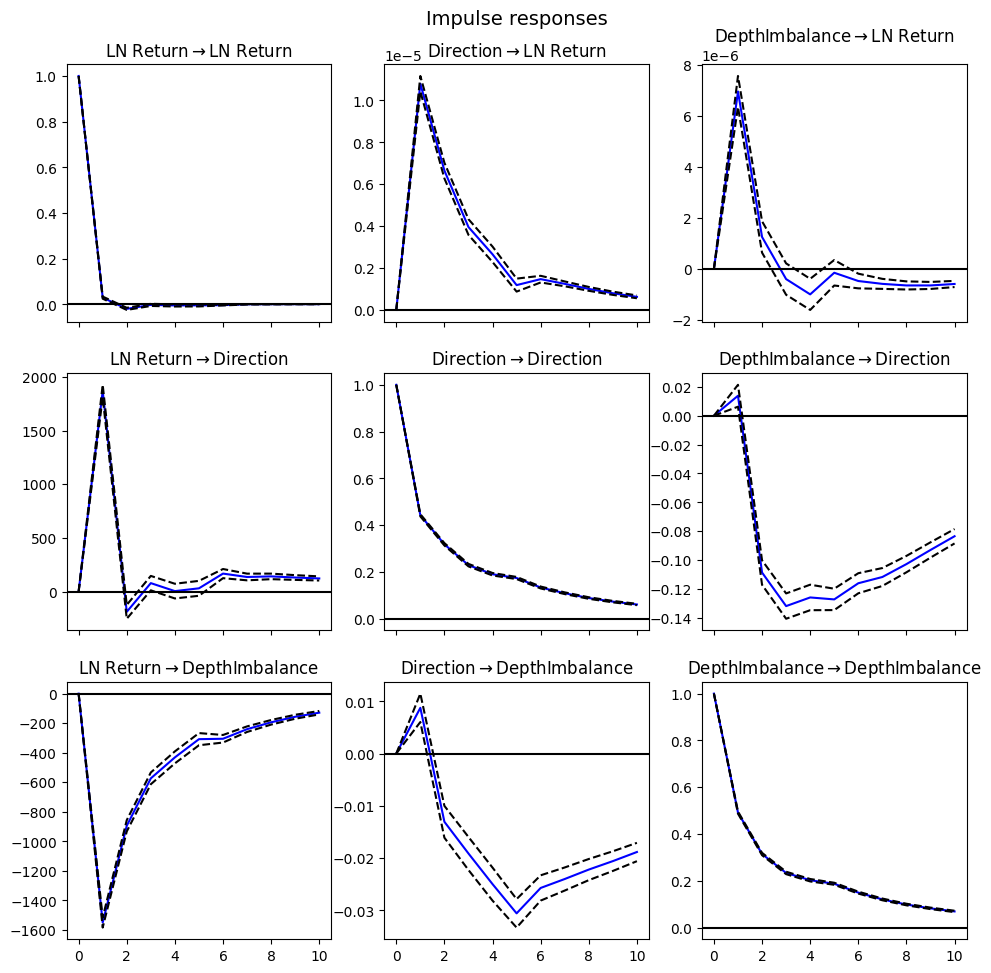

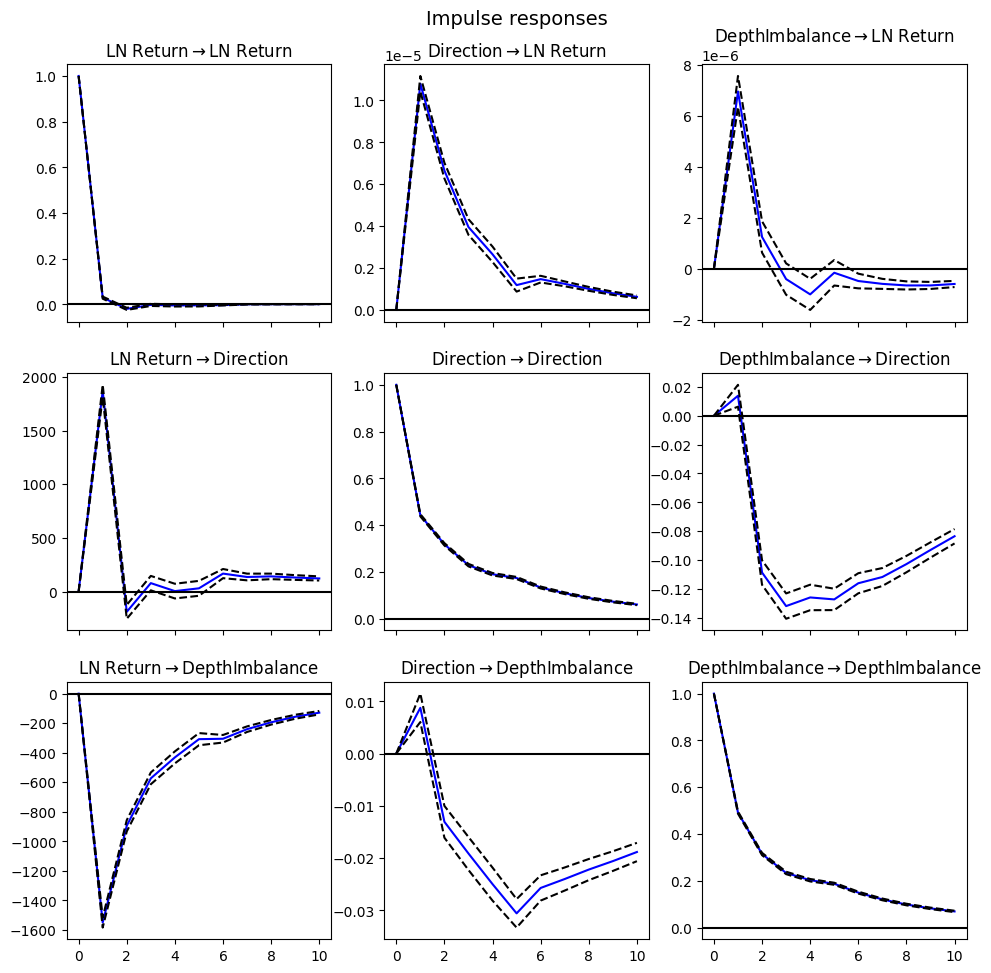

In [10]:
irf3 = dict_res_var3["MSFT_2020-03-02_"].irf(periods=10, var_decomp=None, var_order=None)
irf3.plot()